<a href="https://colab.research.google.com/github/solharsh/Capstone_Sentiment_Analysis/blob/master/Classification_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub
#import tokenization
import seaborn as sns
import matplotlib.pyplot as plt
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
import pickle
DATA_PATH = "/content/drive/My Drive/Capstone Project - NLP"
infile = open(DATA_PATH+'/df.pkl','rb')
df = pickle.load(infile)

In [0]:
df.head()

,Name,Date,Speech,Clean,Clean_english
0,Pranab Mukherjee,"February 26, 2010",Budget 2010-2011 Speech ofPranab MukherjeeMi...,rise Union,rise Union
1,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budg...",interim regular economy grave uncertainties,interim regular economy grave
2,Pranab Mukherjee,"February 26, 2010",Growth had started decelerating and the busin...,Growth started decelerating business sentiment...,Growth business sentiment weak
3,Pranab Mukherjee,"February 26, 2010",The economy's capacity to sustain high growth...,economy capacity sustain high growth threat wi...,economy capacity sustain high growth threat wi...
5,Pranab Mukherjee,"February 26, 2010","It was not clear to us, as also to the polic...",policy makers countries crisis eventually unfold,policy crisis eventually unfold


In [6]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 6.4MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

sentiment=[]
for sentence in df.Clean_english:
  sentiment.append(analyser.polarity_scores(sentence)['compound'])

df['sentiment_vadar']=sentiment

In [0]:
df

,Name,Date,Speech,Clean,Clean_english,sentiment_vadar
0,Pranab Mukherjee,"February 26, 2010",Budget 2010-2011 Speech ofPranab MukherjeeMi...,rise Union,rise Union,0.0000
1,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budg...",interim regular economy grave uncertainties,interim regular economy grave,-0.3818
2,Pranab Mukherjee,"February 26, 2010",Growth had started decelerating and the busin...,Growth started decelerating business sentiment...,Growth business sentiment weak,-0.0772
3,Pranab Mukherjee,"February 26, 2010",The economy's capacity to sustain high growth...,economy capacity sustain high growth threat wi...,economy capacity sustain high growth threat wi...,-0.2023
5,Pranab Mukherjee,"February 26, 2010","It was not clear to us, as also to the polic...",policy makers countries crisis eventually unfold,policy crisis eventually unfold,-0.6249
...,...,...,...,...,...,...
12311,Piyush Goyal,"February 1, 2019",Development has become a mass-movement during...,Development mass movement period Government,Development mass movement period Government,0.0000
12313,Piyush Goyal,"February 1, 2019",We will transform India into a leading nation...,transform leading nation world help people,transform leading nation world help people,0.4019
12314,Piyush Goyal,"February 1, 2019","We, along with them have laid the foundation",laid foundation,laid foundation,0.0000
12315,Piyush Goyal,"February 1, 2019",A grand edifice will be erected with their su...,grand edifice erected support,grand edifice support,0.6908


# Classification

In [0]:
df_selected = df[['Clean_english','sentiment_vadar']]

In [0]:
df_selected

,Clean_english,sentiment_vadar
0,rise Union,0.0000
1,interim regular economy grave,-0.3818
2,Growth business sentiment weak,-0.0772
3,economy capacity sustain high growth threat wi...,-0.2023
5,policy crisis eventually unfold,-0.6249
...,...,...
12311,Development mass movement period Government,0.0000
12313,transform leading nation world help people,0.4019
12314,laid foundation,0.0000
12315,grand edifice support,0.6908


In [0]:
df_selected["sentiment_vadar"] = df_selected["sentiment_vadar"].apply(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_selected

,Clean_english,sentiment_vadar
0,rise Union,0
1,interim regular economy grave,0
2,Growth business sentiment weak,0
3,economy capacity sustain high growth threat wi...,0
5,policy crisis eventually unfold,0
...,...,...
12311,Development mass movement period Government,0
12313,transform leading nation world help people,1
12314,laid foundation,0
12315,grand edifice support,1


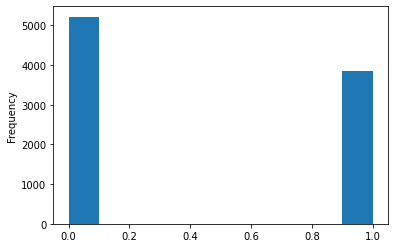

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

df_selected["sentiment_vadar"].plot.hist()
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(df_selected[["Clean_english"]],
                                                  df_selected["sentiment_vadar"].tolist(),
                                                  test_size=0.10,
                                                  shuffle=True
                                                 )

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize the binary count vectorizer
tfidf_vectorizer = CountVectorizer(binary=True,
                                   max_features=200    # Limit the vocabulary size
                                  )
# Fit and transform
X_train_text_vectors = tfidf_vectorizer.fit_transform(X_train["Clean_english"].tolist())
# Only transform
X_val_text_vectors = tfidf_vectorizer.transform(X_val["Clean_english"].tolist())

In [0]:
print(tfidf_vectorizer.vocabulary_)

{'benefit': 17, 'market': 119, 'exemption': 69, 'extended': 72, 'propose': 149, 'corporate': 38, 'income': 96, 'tax': 184, 'extend': 71, 'investment': 107, 'deduction': 47, 'financial': 74, 'sector': 167, 'growth': 86, 'economy': 56, 'needs': 127, 'support': 180, 'provide': 150, 'cost': 39, 'capital': 23, 'goods': 83, 'central': 27, 'scheme': 165, 'infrastructure': 102, 'enable': 61, 'department': 49, 'focus': 76, 'national': 124, 'pension': 134, 'system': 181, 'order': 132, 'effect': 58, 'taken': 182, 'increase': 97, 'limit': 112, 'current': 45, 'payment': 133, 'case': 24, 'government': 84, 'section': 166, 'account': 1, 'skill': 172, 'development': 50, 'continue': 37, 'customs': 46, 'target': 183, 'domestic': 53, 'money': 123, 'major': 114, 'access': 0, 'policy': 140, 'work': 197, 'enhance': 65, 'revenue': 162, 'self': 169, 'cent': 26, 'total': 188, 'respect': 160, 'reduce': 158, 'small': 173, 'bring': 20, 'levy': 110, 'rate': 156, 'agriculture': 6, 'fund': 80, 'crore': 44, 'plan': 13

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, f1_score
# To improve the performance of LogisticRegression we can tune its parameters, for example:
# * regularization type: penalty = {l1, l2, elasticnet}
# * regularization strength: C = {smaller values specify stronger regularization} 
#    !!! LogisticRegression regularized cost function: C*Cost(w) + penalty(w), 
# where w is the weights vector !!!
# * addressing class imbalance: 
# class_weight = {balanced or {class label:weight, class label:weight}, ...}
lrClassifier = LogisticRegression(penalty = 'l2',
                                  C = 0.1,
                                  class_weight = 'balanced')
lrClassifier.fit(X_train_text_vectors, y_train)
lrClassifier_val_predictions = lrClassifier.predict(X_val_text_vectors)
 
print("LogisticRegression on Validation: Accuracy Score: %f, F1-score: %f" % \
      (accuracy_score(y_val, lrClassifier_val_predictions), f1_score(y_val, lrClassifier_val_predictions)))

LogisticRegression on Validation: Accuracy Score: 0.789416, F1-score: 0.700157


In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
 
# Calculate the precision and recall using different values for the classification threshold
val_predictions_probs = lrClassifier.predict_proba(X_val_text_vectors)
precisions, recalls, thresholds = precision_recall_curve(y_val, val_predictions_probs[:, 1])

Highest F1 score on Validation: 0.7093596059113302 , Threshold for the highest F1 score: 0.544688858001977


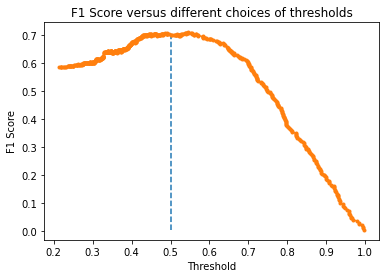

In [0]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
# Calculate the F1 score using different values for the classification threshold, 
# and pick the threshold that resulted in the highest F1 score.
highest_f1 = 0
threshold_highest_f1 = 0
f1_scores = []
for id, threshold in enumerate(thresholds):

    f1_score = 2*precisions[id]*recalls[id]/(precisions[id]+recalls[id])
    f1_scores.append(f1_score)
    if(f1_score > highest_f1):
        highest_f1 = f1_score
        threshold_highest_f1 = threshold
print("Highest F1 score on Validation:", highest_f1, \
      ", Threshold for the highest F1 score:", threshold_highest_f1)
# Let's plot the F1 score versus different choices of thresholds
plt.plot([0.5, 0.5], [np.min(f1_scores), np.max(f1_scores)], linestyle='--')
plt.plot(thresholds, f1_scores, marker='.')
plt.title('F1 Score versus different choices of thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.show()

In [0]:
# Training the model and checking on Validation data
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

lrClassifier = LogisticRegression(penalty = 'l2')

lrClassifier.fit(X_train_text_vectors, y_train)
lrClassifier_val_predictions = lrClassifier.predict(X_val_text_vectors)
print(classification_report(y_val, lrClassifier_val_predictions)) 

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       535
           1       0.91      0.57      0.70       372

    accuracy                           0.80       907
   macro avg       0.84      0.77      0.78       907
weighted avg       0.83      0.80      0.79       907



# K Nearest Neighbors Model

In [0]:
#Let's get our binary vectors for the text field

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
# Initialize the binary count vectorizer
tfidf_vectorizer = CountVectorizer(binary=True,
                                   max_features=200    # Limit the vocabulary size
                                  )
# Fit and transform
X_train_text_vectors = tfidf_vectorizer.fit_transform(X_train["Clean_english"].tolist())
# Only transform
X_val_text_vectors = tfidf_vectorizer.transform(X_val["Clean_english"].tolist())

In [0]:
print(tfidf_vectorizer.vocabulary_)

{'benefit': 17, 'market': 119, 'exemption': 69, 'extended': 72, 'propose': 149, 'corporate': 38, 'income': 96, 'tax': 184, 'extend': 71, 'investment': 107, 'deduction': 47, 'financial': 74, 'sector': 167, 'growth': 86, 'economy': 56, 'needs': 127, 'support': 180, 'provide': 150, 'cost': 39, 'capital': 23, 'goods': 83, 'central': 27, 'scheme': 165, 'infrastructure': 102, 'enable': 61, 'department': 49, 'focus': 76, 'national': 124, 'pension': 134, 'system': 181, 'order': 132, 'effect': 58, 'taken': 182, 'increase': 97, 'limit': 112, 'current': 45, 'payment': 133, 'case': 24, 'government': 84, 'section': 166, 'account': 1, 'skill': 172, 'development': 50, 'continue': 37, 'customs': 46, 'target': 183, 'domestic': 53, 'money': 123, 'major': 114, 'access': 0, 'policy': 140, 'work': 197, 'enhance': 65, 'revenue': 162, 'self': 169, 'cent': 26, 'total': 188, 'respect': 160, 'reduce': 158, 'small': 173, 'bring': 20, 'levy': 110, 'rate': 156, 'agriculture': 6, 'fund': 80, 'crore': 44, 'plan': 13

In [0]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [0]:
K_values = [3, 5, 10, 20, 30]
 
for K in K_values:
    knnClassifier = KNeighborsClassifier(n_neighbors=K)
    knnClassifier.fit(X_train_text_vectors, y_train)
    val_predictions = knnClassifier.predict(X_val_text_vectors)
    print("F1 Score for K:", K, "is", f1_score(y_val, val_predictions))

F1 Score for K: 3 is 0.527363184079602
F1 Score for K: 5 is 0.5054151624548736
F1 Score for K: 10 is 0.40748440748440745
F1 Score for K: 20 is 0.30248306997742663
F1 Score for K: 30 is 0.2632794457274827


In [104]:
pip install docx2txt

  Created wheel for docx2txt: filename=docx2txt-0.8-cp36-none-any.whl size=3963 sha256=ea84dd1644f936d763d4a974ffb5e6d9d5dcc1082f41396ae27a094774c73dab
  Stored in directory: /root/.cache/pip/wheels/b2/1f/26/a051209bbb77fc6bcfae2bb7e01fa0ff941b82292ab084d596
Successfully built docx2txt


In [0]:
import docx2txt

In [0]:
# read in word file
df_2020 = docx2txt.process("/content/drive/My Drive/NLP/budget_speech.docx")

In [0]:
import re
df_2020 = re.sub('\s+', ' ', df_2020)
df_2020= df_2020.split("2020-2021. Introduction",1)[1] 

In [108]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk.tokenize import sent_tokenize
list_2020= sent_tokenize(df_2020)

In [0]:
import pandas as pd
df_2020_selected = pd.DataFrame(list_2020, columns=['Speech'])

In [111]:
df_2020_selected

,Speech
0,"In May 2019, Prime Minister Modi received a m..."
1,"With renewed vigour, under his leadership, we ..."
2,2.
3,People of India have unequivocally given their...
4,This is the Budget to boost their incomes and ...
...,...
1127,3 The refund of accumulated credit of compensa...
1128,3/2019- Compensation Cess (Rate) dated 30.9.2019.
1129,This notification is being given retrospective...
1130,"Accordingly, no refund on account of inverted ..."


In [0]:
k=0
desc_list=[]
for line in df_2020_selected.Speech:  
  text = re.sub('<.*?>', '',line) #This expression removes the <br> which is found at the end of every sentence
  text = re.sub(r'[^A-Za-z]+', ' ', text)
  text = re.sub(r'[\d{1,}]+',' ',text)
  desc_list.append(re.sub('Borrower added on \d{2}/\d{2}/\d{2} >', '', text)) # This removes the date/year in every sentence
  
  k=k+1
df_2020_selected['Speech_cleaned'] = desc_list

In [0]:
df_2020_selected

,Speech,Speech_cleaned
0,"In May 2019, Prime Minister Modi received a m...",In May Prime Minister Modi received a massive...
1,"With renewed vigour, under his leadership, we ...",With renewed vigour under his leadership we co...
2,2.,
3,People of India have unequivocally given their...,People of India have unequivocally given their...
4,This is the Budget to boost their incomes and ...,This is the Budget to boost their incomes and ...
...,...,...
1127,3 The refund of accumulated credit of compensa...,The refund of accumulated credit of compensat...
1128,3/2019- Compensation Cess (Rate) dated 30.9.2019.,Compensation Cess Rate dated
1129,This notification is being given retrospective...,This notification is being given retrospective...
1130,"Accordingly, no refund on account of inverted ...",Accordingly no refund on account of inverted d...


In [0]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
%%time

# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df_2020_selected["Speech_cleaned"] = df_2020_selected["Speech_cleaned"].apply(lambda x: clean_text(x))

CPU times: user 841 ms, sys: 32.2 ms, total: 873 ms
Wall time: 873 ms


In [0]:
df_2020_selected

,Speech,Speech_cleaned
0,"In May 2019, Prime Minister Modi received a m...",may prime minister modi receive massive mandat...
1,"With renewed vigour, under his leadership, we ...",renew vigour leadership commit serve people in...
2,2.,
3,People of India have unequivocally given their...,people india unequivocally give jan aadesh pol...
4,This is the Budget to boost their incomes and ...,budget boost income enhance purchase power
...,...,...
1127,3 The refund of accumulated credit of compensa...,refund accumulate credit compensation ce tobac...
1128,3/2019- Compensation Cess (Rate) dated 30.9.2019.,compensation ce rate date
1129,This notification is being given retrospective...,notification give retrospective effect onwards
1130,"Accordingly, no refund on account of inverted ...",accordingly refund account invert duty structu...


In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

snow = SnowballStemmer('english') 
stop = stopwords.words('english')

#excluding some useful words from stop words list
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
            "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
            
stop_words = [word for word in stop if word not in excluding]

def process_text(texts): 
    final_text_list=[]
    for sent in texts:
        filtered_sentence=[]
        sent = sent.lower()
        for w in word_tokenize(sent):
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):  
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) #final string of cleaned words

        final_text_list.append(final_string)
    return final_text_list

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
print("Process test dataset")
X_test_text_processed = process_text(df_2020_selected["Speech_cleaned"].values) 

Process test dataset


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_title_vectorizer = TfidfVectorizer(max_features=50)
tfidf_text_vectorizer = TfidfVectorizer(max_features=2000)

X_test_text_vectors = tfidf_vectorizer.transform(X_test_text_processed)

In [0]:
# Make predictions using our trained model
test_prediction = lrClassifier.predict(X_test_text_vectors)

In [0]:
result_df = pd.DataFrame()
result_df["Cleaned_2020_Speech"] = df_2020_selected["Speech_cleaned"]
result_df["sentiment"] = test_prediction

In [0]:
result_df.head(50)

,Cleaned_2020_Speech,sentiment
0,may prime minister modi receive massive mandat...,0
1,renew vigour leadership commit serve people in...,0
2,,0
3,people india unequivocally give jan aadesh pol...,0
4,budget boost income enhance purchase power,0
5,high growth achieve youth gainfully meaningful...,1
6,let business innovative healthy solvent use te...,0
7,,0
8,today youth bear turn century every member sch...,0
9,,0


In [0]:
result_df.to_csv("/content/drive/My Drive/Capstone Project - NLP/Harsh/sentiment_prediction_speech_2020.csv", encoding='utf-8', index=False)

In [0]:
import pickle
DATA_PATH = "/content/drive/My Drive/Capstone Project - NLP"
infile = open(DATA_PATH+'/df.pkl','rb')
df = pickle.load(infile)

In [3]:
df.head()

,Name,Date,Speech,Clean,Clean_english
0,Pranab Mukherjee,"February 26, 2010",Budget 2010-2011 Speech ofPranab MukherjeeMi...,rise Union,rise Union
1,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budg...",interim regular economy grave uncertainties,interim regular economy grave
2,Pranab Mukherjee,"February 26, 2010",Growth had started decelerating and the busin...,Growth started decelerating business sentiment...,Growth business sentiment weak
3,Pranab Mukherjee,"February 26, 2010",The economy's capacity to sustain high growth...,economy capacity sustain high growth threat wi...,economy capacity sustain high growth threat wi...
5,Pranab Mukherjee,"February 26, 2010","It was not clear to us, as also to the polic...",policy makers countries crisis eventually unfold,policy crisis eventually unfold


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

sentiment=[]
for sentence in df.Clean_english:
  sentiment.append(analyser.polarity_scores(sentence)['compound'])

df['sentiment_vadar']=sentiment

df_selected = df[['Clean_english','sentiment_vadar']]

In [0]:
df_selected.to_csv("/content/drive/My Drive/Capstone Project - NLP/Harsh/classification_raw.csv", encoding='utf-8', index=False)

# Cleaning the corpus

In [0]:
# # Import necessary dependencies
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata

nlp = spacy.load('en', parse = False, tag=False, entity=False)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')


# # Cleaning Text - strip HTML
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text


# # Removing accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


# # Removing Special Characters
def remove_special_characters(text):
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    return text


# # Lemmatizing text
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


# # Removing Stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


# # Normalize text corpus - tying it all together
def normalize_corpus(corpus, html_stripping=True, #contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True):
    
    normalized_corpus = []
    
    for doc in corpus:
        
        if html_stripping:
            doc = strip_html_tags(doc)
        
        if accented_char_removal:
            doc = remove_accented_chars(doc)
                
        if text_lower_case:
            doc = doc.lower()
            
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        
        if text_lemmatization:
            doc = lemmatize_text(doc)
            
        if special_char_removal:
            doc = remove_special_characters(doc)  
            
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [0]:
normalized_corpus_for_classification = normalize_corpus(df_selected.Clean_english)

In [15]:
!pip install Afinn

     |████████████████████████████████| 61kB 3.6MB/s 
  Created wheel for Afinn: filename=afinn-0.1-cp36-none-any.whl size=53452 sha256=892c0675c6003360fb358324252f930c54eec1673c15d1187c0c3e919a8d29a8
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built Afinn


In [0]:
from afinn import Afinn

afn = Afinn()

In [18]:
for speech, sentiment in zip(df_selected['Clean_english'], df_selected['sentiment_vadar']):
    print('Speech:', speech)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', afn.score(speech))
    print('-'*60)

Streaming output truncated to the last 5000 lines.
Actual Sentiment: 0.296
Predicted Sentiment polarity: 2.0
------------------------------------------------------------
Speech: world domestic aviation market ripe enter aircraft leasing
Actual Sentiment: 0.0
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Speech: critical development self reliant aviation industry aviation finance business available financial Special Economic International Financial
Actual Sentiment: 0.2263
Predicted Sentiment polarity: 2.0
------------------------------------------------------------
Speech: Government implement essential regulatory making hub
Actual Sentiment: 0.0
Predicted Sentiment polarity: 0.0
------------------------------------------------------------
Speech: providing ecosystem growth Maintenance Repair Overhaul industry leverage engineering advantage potential achieve self reliance vital aviation segment
Actual Sentiment: 0.7003
Predicted Sentimen

In [0]:
sentiment_polarity = [afn.score(speech) for speech in df_selected.Clean_english]
predicted_sentiments = ['positive' if score >= 1.0 else 'negative' for score in sentiment_polarity]

In [24]:
df_selected["sentiment_vadar"] = df_selected["sentiment_vadar"].apply(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Load and normalize data

In [0]:
#normalized_corpus_for_classification

# Sentiment Analysis with VADER to Assign Sentiment to our cleaned dataset

In [68]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Sentiment Analysis with VADER

In [0]:
def analyze_sentiment_vader_lexicon(review, 
                                    threshold=0.1,
                                    verbose=False):
      
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 'positive' if agg_score >= threshold\
                                   else 'negative'
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        sentiment_frame = pd.DataFrame([[final_sentiment, final, positive,
                                        negative, neutral]])
        print(sentiment_frame)
    
    return final_sentiment

In [0]:
predicted_sentiments = [analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=False) for review in normalized_corpus_for_classification]

In [0]:
df_new = pd.DataFrame(normalized_corpus_for_classification,columns=['Speech_sent'])

In [76]:
df_new.head()

,Speech_sent
0,rise union
1,interim regular economy grave
2,growth business sentiment weak
3,economy capacity sustain high growth threat wi...
4,policy crisis eventually unfold


In [0]:
df_new['sentiment_vadar']=predicted_sentiments

In [86]:
df_new.tail()

,Speech_sent,sentiment_vadar
9060,development mass movement period government,negative
9061,transform lead nation world help people,positive
9062,lay foundation,negative
9063,grand edifice support,positive
9064,decisive leadership policy transparent integri...,positive


In [0]:
df_new.to_csv("/content/drive/My Drive/Capstone Project - NLP/Harsh/sentiment_prediction_latest_29may.csv", encoding='utf-8', index=False)

# Load and normalize data

In [0]:
df_new = pd.read_csv(r'/content/drive/My Drive/Capstone Project - NLP/Harsh/sentiment_prediction_latest_29may.csv')

reviews = np.array(df_new['Speech_sent'])
sentiments = np.array(df_new['sentiment_vadar'])

train_reviews = reviews[:7500]
train_sentiments = sentiments[:7500]
test_reviews = reviews[7500:]
test_sentiments = sentiments[7500:]

# Traditional Supervised Machine Learning Models

In [0]:
#Define a function to evaluate the model
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)

## Feature Engineering

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(train_reviews)
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(train_reviews)

In [0]:
# transform test reviews into features
cv_test_features = cv.transform(test_reviews)
tv_test_features = tv.transform(test_reviews)

In [125]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (7500, 34349)  Test features shape: (1565, 34349)
TFIDF model:> Train features shape: (7500, 34349)  Test features shape: (1565, 34349)


## Model Training, Prediction and Performance Evaluation

In [0]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge')

In [0]:
def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    

In [0]:
# Logistic Regression model on BOW features
lr_bow_predictions = train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)

In [133]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8984
Precision: 0.9012
Recall: 0.8984
F1 Score: 0.8936

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.93      0.70      0.80       449
    negative       0.89      0.98      0.93      1116

    accuracy                           0.90      1565
   macro avg       0.91      0.84      0.87      1565
weighted avg       0.90      0.90      0.89      1565



In [136]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=train_sentiments,
                                               test_features=tv_test_features, test_labels=test_sentiments)
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8441
Precision: 0.8653
Recall: 0.8441
F1 Score: 0.8245

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.97      0.47      0.63       449
    negative       0.82      0.99      0.90      1116

    accuracy                           0.84      1565
   macro avg       0.90      0.73      0.77      1565
weighted avg       0.87      0.84      0.82      1565



In [138]:
svm_bow_predictions = train_predict_model(classifier=svm, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.899
Precision: 0.8975
Recall: 0.899
F1 Score: 0.8975

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.86      0.78      0.82       449
    negative       0.91      0.95      0.93      1116

    accuracy                           0.90      1565
   macro avg       0.89      0.86      0.87      1565
weighted avg       0.90      0.90      0.90      1565



In [139]:
svm_tfidf_predictions = train_predict_model(classifier=svm, 
                                                train_features=tv_train_features, train_labels=train_sentiments,
                                                test_features=tv_test_features, test_labels=test_sentiments)
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.9157
Precision: 0.9149
Recall: 0.9157
F1 Score: 0.914

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.90      0.80      0.84       449
    negative       0.92      0.96      0.94      1116

    accuracy                           0.92      1565
   macro avg       0.91      0.88      0.89      1565
weighted avg       0.91      0.92      0.91      1565



# Newer Supervised Deep Learning Models

In [0]:
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder

In [0]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()

In [0]:
le = LabelEncoder()
num_classes=2 
# tokenize train reviews & encode train labels
tokenized_train = [tokenizer.tokenize(text)
                   for text in train_reviews]
y_tr = le.fit_transform(train_sentiments)
y_train = keras.utils.to_categorical(y_tr, num_classes)
# tokenize test reviews & encode test labels
tokenized_test = [tokenizer.tokenize(text)
                   for text in norm_test_reviews]
y_ts = le.fit_transform(test_sentiments)
y_test = keras.utils.to_categorical(y_ts, num_classes)

In [221]:
# print class label encoding map and encoded labels
print('Sentiment class label map:', dict(zip(le.classes_, le.transform(le.classes_))))
print('Sample test label transformation:\n'+'-'*35,
      '\nActual Labels:', test_sentiments[:3], '\nEncoded Labels:', y_ts[:3], 
      '\nOne hot encoded Labels:\n', y_test[:3])


Sentiment class label map: {'negative': 0, 'positive': 1}
Sample test label transformation:
----------------------------------- 
Actual Labels: ['negative' 'negative' 'negative'] 
Encoded Labels: [0 0 0] 
One hot encoded Labels:
 [[1. 0.]
 [1. 0.]
 [1. 0.]]


## Feature Engineering with word embeddings

In [0]:
# build word2vec model
w2v_num_features = 500
w2v_model = gensim.models.Word2Vec(tokenized_train, size=w2v_num_features, window=150,
                                   min_count=10, sample=1e-3)

In [0]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [246]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=500)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=500)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [0]:
nlp = spacy.load('en', parse = False, tag= False, entity=False)

In [0]:
train_reviews_ = []
for i in train_reviews:
  train_reviews_.append(str(i))

test_reviews_ = []
for i in test_reviews:
  train_reviews_.append(str(i))  

In [0]:
train_nlp = [nlp(i) for i in train_reviews]

In [0]:
# feature engineering with GloVe model
train_nlp = [nlp(item) for item in train_reviews_]
train_glove_features = np.array([item.vector for item in train_nlp])

test_nlp = [nlp(item) for item in train_reviews_]
test_glove_features = np.array([item.vector for item in test_nlp])

In [273]:
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)
print('GloVe model:> Train features shape:', train_glove_features.shape, ' Test features shape:', test_glove_features.shape)

Word2Vec model:> Train features shape: (7500, 500)  Test features shape: (1565, 500)
GloVe model:> Train features shape: (1565, 96)  Test features shape: (1565, 96)


# Modeling with deep neural networks

Building Deep neural network architecture

In [0]:
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, activation='relu', input_shape=(num_input_features,)))
    dnn_model.add(Dropout(0.5))
    #dnn_model.add(Dense(512, activation='relu'))
    #dnn_model.add(Dropout(0.2))
    #dnn_model.add(Dense(96, activation='relu'))
    #dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(2))
    dnn_model.add(Activation('softmax'))

    dnn_model.compile(loss='categorical_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])
    return dnn_model

In [0]:
w2v_dnn = construct_deepnn_architecture(num_input_features=500)

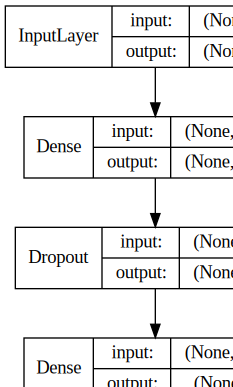

In [318]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(w2v_dnn, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))


In [319]:
batch_size = 100
w2v_dnn.fit(avg_wv_train_features, y_train, epochs=5, batch_size=batch_size, 
            shuffle=True, validation_split=0.1, verbose=1)

Train on 6750 samples, validate on 750 samples
Epoch 1/5
6750/6750 [==============================] - 0s 65us/step - loss: 0.5874 - accuracy: 0.7400 - val_loss: 0.5822 - val_accuracy: 0.7453
Epoch 2/5
6750/6750 [==============================] - 0s 46us/step - loss: 0.5769 - accuracy: 0.7434 - val_loss: 0.5682 - val_accuracy: 0.7453
Epoch 3/5
6750/6750 [==============================] - 0s 46us/step - loss: 0.5710 - accuracy: 0.7434 - val_loss: 0.5658 - val_accuracy: 0.7453
Epoch 4/5
6750/6750 [==============================] - 0s 48us/step - loss: 0.5668 - accuracy: 0.7434 - val_loss: 0.5601 - val_accuracy: 0.7453
Epoch 5/5
6750/6750 [==============================] - 0s 47us/step - loss: 0.5669 - accuracy: 0.7434 - val_loss: 0.5584 - val_accuracy: 0.7453


In [0]:
y_pred = w2v_dnn.predict_classes(avg_wv_test_features)
predictions = le.inverse_transform(y_pred)

In [321]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.7131
Precision: 0.5085
Recall: 0.7131
F1 Score: 0.5937

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.00      0.00      0.00       449
    negative       0.71      1.00      0.83      1116

    accuracy                           0.71      1565
   macro avg       0.36      0.50      0.42      1565
weighted avg       0.51      0.71      0.59      1565



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
glove_dnn = construct_deepnn_architecture(num_input_features=96)

In [329]:
batch_size = 5
glove_dnn.fit(train_glove_features, y_train, epochs=5, batch_size=batch_size, 
              shuffle=True, validation_split=0.1, verbose=1)

ValueError: ignored

In [326]:
y_pred = glove_dnn.predict_classes(test_glove_features)
predictions = le.inverse_transform(y_pred)

ValueError: ignored

In [187]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.7131
Precision: 0.5085
Recall: 0.7131
F1 Score: 0.5937

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.00      0.00      0.00       449
    negative       0.71      1.00      0.83      1116

    accuracy                           0.71      1565
   macro avg       0.36      0.50      0.42      1565
weighted avg       0.51      0.71      0.59      1565



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Sentiment Analysis - Advanced Deep Learning

# Tokenize train & test datasets

In [0]:
tokenized_train = [tokenizer.tokenize(text) for text in train_reviews]
tokenized_test = [tokenizer.tokenize(text) for text in test_reviews]

# Build Vocabulary Mapping (word to index)

In [189]:
from collections import Counter

# build word to index vocabulary
token_counter = Counter([token for review in tokenized_train for token in review])
vocab_map = {item[0]: index+1 for index, item in enumerate(dict(token_counter).items())}
max_index = np.max(list(vocab_map.values()))
vocab_map['PAD_INDEX'] = 0
vocab_map['NOT_FOUND_INDEX'] = max_index+1
vocab_size = len(vocab_map)
# view vocabulary size and part of the vocabulary map
print('Vocabulary Size:', vocab_size)
print('Sample slice of vocabulary map:', dict(list(vocab_map.items())[10:20]))

Vocabulary Size: 4523
Sample slice of vocabulary map: {'capacity': 11, 'sustain': 12, 'high': 13, 'threat': 14, 'widespread': 15, 'economic': 16, 'slowdown': 17, 'world': 18, 'policy': 19, 'crisis': 20}


# Encode and Pad datasets & Encode prediction class labels

In [190]:
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# get max length of train corpus and initialize label encoder
le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0
max_len = np.max([len(review) for review in tokenized_train])

## Train reviews data corpus
# Convert tokenized text reviews to numeric vectors
train_X = [[vocab_map[token] for token in tokenized_review] for tokenized_review in tokenized_train]
train_X = sequence.pad_sequences(train_X, maxlen=max_len) # pad 
## Train prediction class labels
# Convert text sentiment labels (negative\positive) to binary encodings (0/1)
train_y = le.fit_transform(train_sentiments)

## Test reviews data corpus
# Convert tokenized text reviews to numeric vectors
test_X = [[vocab_map[token] if vocab_map.get(token) else vocab_map['NOT_FOUND_INDEX'] 
           for token in tokenized_review] 
              for tokenized_review in tokenized_test]
test_X = sequence.pad_sequences(test_X, maxlen=max_len)
## Test prediction class labels
# Convert text sentiment labels (negative\positive) to binary encodings (0/1)
test_y = le.transform(test_sentiments)

# view vector shapes
print('Max length of train review vectors:', max_len)
print('Train review vectors shape:', train_X.shape, ' Test review vectors shape:', test_X.shape)

Max length of train review vectors: 192
Train review vectors shape: (7500, 192)  Test review vectors shape: (1565, 192)


# Build the LSTM Model Architecture

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, SpatialDropout1D
from keras.layers import LSTM

EMBEDDING_DIM = 128 # dimension for dense embeddings for each token
LSTM_DIM = 64 # total LSTM units

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(LSTM_DIM, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [192]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 192, 128)          578944    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 192, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 628,417
Trainable params: 628,417
Non-trainable params: 0
_________________________________________________________________
None


# Visualize model architecture

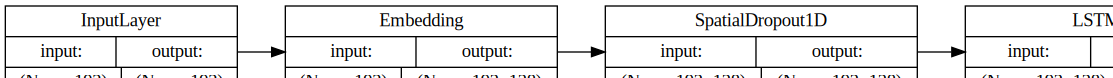

In [193]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='LR').create(prog='dot', format='svg'))

# Train the model

In [194]:
batch_size = 100
model.fit(train_X, train_y, epochs=5, batch_size=batch_size, 
          shuffle=True, validation_split=0.1, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6750 samples, validate on 750 samples
Epoch 1/5
6750/6750 [==============================] - 39s 6ms/step - loss: 0.5316 - accuracy: 0.7496 - val_loss: 0.4671 - val_accuracy: 0.7933
Epoch 2/5
6750/6750 [==============================] - 38s 6ms/step - loss: 0.3434 - accuracy: 0.8548 - val_loss: 0.2694 - val_accuracy: 0.9013
Epoch 3/5
6750/6750 [==============================] - 38s 6ms/step - loss: 0.1545 - accuracy: 0.9434 - val_loss: 0.2477 - val_accuracy: 0.9093
Epoch 4/5
6750/6750 [==============================] - 38s 6ms/step - loss: 0.0921 - accuracy: 0.9723 - val_loss: 0.2673 - val_accuracy: 0.9120
Epoch 5/5
6750/6750 [==============================] - 38s 6ms/step - loss: 0.0618 - accuracy: 0.9784 - val_loss: 0.2948 - val_accuracy: 0.9120


# Predict and Evaluate Model Performance

In [0]:
pred_test = model.predict_classes(test_X)
predictions = le.inverse_transform(pred_test.flatten())

In [196]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.9163
Precision: 0.9159
Recall: 0.9163
F1 Score: 0.9161

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.86      0.85      0.85       449
    negative       0.94      0.94      0.94      1116

    accuracy                           0.92      1565
   macro avg       0.90      0.90      0.90      1565
weighted avg       0.92      0.92      0.92      1565



In [353]:
dataset = pd.read_csv(r'/content/drive/My Drive/Capstone Project - NLP/Harsh/sentiment_prediction_latest_29may.csv')


# take a peek at the data
print(dataset.head())

                                         Speech_sent sentiment_vadar
0                                         rise union        negative
1                      interim regular economy grave        negative
2                     growth business sentiment weak        negative
3  economy capacity sustain high growth threat wi...        negative
4                    policy crisis eventually unfold        negative


In [0]:
reviews = np.array(dataset['Speech_sent'])
sentiments = np.array(dataset['sentiment_vadar'])


# build train and test datasets
train_reviews = reviews[:7500]
train_sentiments = sentiments[:7500]
test_reviews = reviews[7500:]
test_sentiments = sentiments[7500:]


train_reviews_ = []
for i in train_reviews:
  train_reviews_.append(str(i))

test_reviews_ = []
for i in test_reviews:
  test_reviews_.append(str(i))  

# normalize datasets
norm_train_reviews = normalize_corpus(train_reviews_)
norm_test_reviews = normalize_corpus(test_reviews_)

# Build Text Classification Pipeline with The Best Model

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)
# build Logistic Regression model
lr = LogisticRegression()
lr.fit(cv_train_features, train_sentiments)

# Build Text Classification Pipeline
lr_pipeline = make_pipeline(cv, lr)

# save the list of prediction classes (positive, negative)
classes = list(lr_pipeline.classes_)

# Analyze Model Prediction Probabilities

In [350]:
print(df_2020_selected.Speech[201])
print(df_2020_selected.Speech[600])

Now, more needs to be done towards liquid and grey water management.
This will give retail investors access to government securities as much as giving an attractive investment for pension funds and long-term investors.


In [356]:
lr_pipeline.predict(['Now, more needs to be done towards liquid and grey water management.', 
                     'This will give retail investors access to government securities as much as giving an attractive investment for pension funds and long-term investors.'])

array(['negative', 'negative'], dtype=object)

In [361]:
pd.DataFrame(lr_pipeline.predict_proba(['Now, more needs to be done towards liquid and grey water management', 
                     'This will give retail investors access to government securities as much as giving an attractive investment for pension funds and long-term investors']), columns=classes)

,negative,positive
0,0.938051,0.061949
1,0.781422,0.218578


In [362]:
from sklearn.feature_extraction.text import TfidfVectorizer

# consolidate all normalized reviews
norm_reviews = norm_train_reviews+norm_test_reviews
# get tf-idf features for only positive reviews
positive_reviews = [review for review, sentiment in zip(norm_reviews, sentiments) if sentiment == 'positive']
ptvf = TfidfVectorizer(use_idf=True, min_df=0.05, max_df=0.95, ngram_range=(1,1), sublinear_tf=True)
ptvf_features = ptvf.fit_transform(positive_reviews)
# get tf-idf features for only negative reviews
negative_reviews = [review for review, sentiment in zip(norm_reviews, sentiments) if sentiment == 'negative']
ntvf = TfidfVectorizer(use_idf=True, min_df=0.05, max_df=0.95, ngram_range=(1,1), sublinear_tf=True)
ntvf_features = ntvf.fit_transform(negative_reviews)
# view feature set dimensions
print(ptvf_features.shape, ntvf_features.shape)

(2372, 11) (6693, 5)


In [410]:
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')
nltk.download('wordnet')

def analyze_sentiment_sentiwordnet_lexicon(review,
                                           verbose=False):

    # tokenize and POS tag text tokens
    tagged_text = [(token.text, token.tag_) for token in nlp(review)]
    pos_score = neg_score = token_count = obj_score = 0
    # get wordnet synsets based on POS tags
    # get sentiment scores if synsets are found
    for word, tag in tagged_text:
        ss_set = None
        if 'NN' in tag and list(swn.senti_synsets(word, 'n')):
            ss_set = list(swn.senti_synsets(word, 'n'))[0]
        elif 'VB' in tag and list(swn.senti_synsets(word, 'v')):
            ss_set = list(swn.senti_synsets(word, 'v'))[0]
        elif 'JJ' in tag and list(swn.senti_synsets(word, 'a')):
            ss_set = list(swn.senti_synsets(word, 'a'))[0]
        elif 'RB' in tag and list(swn.senti_synsets(word, 'r')):
            ss_set = list(swn.senti_synsets(word, 'r'))[0]
        # if senti-synset is found        
        if ss_set:
            # add scores for all found synsets
            pos_score += ss_set.pos_score()
            neg_score += ss_set.neg_score()
            obj_score += ss_set.obj_score()
            token_count += 1
    
    # aggregate final scores
    final_score = pos_score - neg_score
    norm_final_score = round(float(final_score) / token_count, 2)
    final_sentiment = 'positive' if norm_final_score >= 0 else 'negative'
    if verbose:
        norm_obj_score = round(float(obj_score) / token_count, 2)
        norm_pos_score = round(float(pos_score) / token_count, 2)
        norm_neg_score = round(float(neg_score) / token_count, 2)
        # to display results in a nice table
        sentiment_frame = pd.DataFrame([[final_sentiment, norm_obj_score, norm_pos_score, 
                                         norm_neg_score, norm_final_score]])
        print(sentiment_frame)
        
    return final_sentiment


[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [412]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    pred = analyze_sentiment_sentiwordnet_lexicon(review, verbose=False)    
    print('-'*60)

REVIEW: central road fund act section central road fund substitute clause subsection provide formula redistribution cess
Actual Sentiment: negative
------------------------------------------------------------
REVIEW: country emergence set industry capital stand scheme
Actual Sentiment: negative
------------------------------------------------------------
REVIEW: direct tax
Actual Sentiment: negative
------------------------------------------------------------
